In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

#machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### As there is no survival column in test data. We have to predict the survival column.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### As we can see that column age, cabin, embarked have some missing values so we have to fill it.

### Analysis

In [10]:
train_df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by= 'Survived', ascending= False)

,Survived
Sex,
female,0.742038
male,0.188908


#### It shows that female have more chances of survival as compared to male.

In [11]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### It shows that higher the number of your class higher is the survival rate.

In [12]:
train_df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by= 'Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


#### It shows that if you belongs to 'C' then your survival rate is higher.

## Visualization

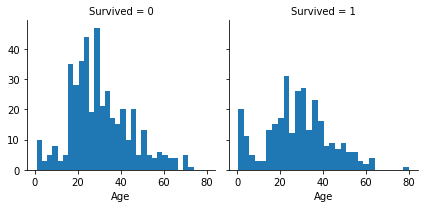

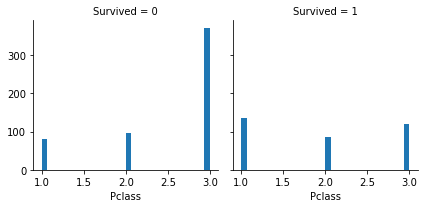

In [13]:
p = sns.FacetGrid(train_df, col = 'Survived')
p.map(plt.hist, 'Age', bins = 30)
q = sns.FacetGrid(train_df, col='Survived')
q.map(plt.hist, 'Pclass', bins=30)

* Younger and older people survived.
* The middle age (20-40) people did not survive.
* Pclass=3 has lesser chance of survival.

### Preprocessing

In [14]:
# drop unwanted columns from the dataset
train_df = train_df.drop(['PassengerId','Cabin','Name','Ticket','Fare'], axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [15]:
test_df = test_df.drop(['Cabin', 'Name', 'Ticket','Fare'], axis = 1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


#### Map female to 1 and male to 0 in dataset

In [16]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


#### Since 'Embarked' has only two values missing as we seen above. So here we are filling it with most common value.

In [17]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [18]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [19]:
# Filling the missing value of age column
combine = [train_df, test_df]
mean_data = train_df['Age'].mean()
for dataset in combine:
    dataset['Age'] = round(dataset['Age'].fillna(mean_data)).astype(int)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,0
1,1,1,1,38,1,0,1
2,1,3,1,26,0,0,0
3,1,1,1,35,1,0,0
4,0,3,0,35,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0
887,1,1,1,19,0,0,0
888,0,3,1,30,1,2,0
889,1,1,0,26,0,0,1


In [20]:
for  dataset in combine:
    dataset.loc[dataset['Age'] <= 16 ,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


# Machine Learning Models

### Make x_train , y_train ,x_test

In [21]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
x_test = test_df.drop('PassengerId', axis=1).copy()
x_train.shape, y_train.shape, x_test.shape


((891, 6), (891,), (418, 6))

## 1. Logistic Regression

In [22]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_predict = logReg.predict(x_test)
acc_log = round(logReg.score(x_train,y_train)*100, 2)
acc_log

79.46

## 2. Support Vector Machines

In [23]:
svc = SVC()
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train)*100,2)
acc_svc

82.94

## 3. Decision Tree Classifier

In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_predict = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train)*100, 2)
acc_decision_tree

86.31

## 4. Random Forest

In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
Y_predict = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

86.31

## 5. KNN Neighbors**

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
Y_predict = knn.predict(x_test)
acc_knn = round(knn.score(x_train,y_train) * 100 ,2)
acc_knn


83.73

## Model Evalution

In [27]:
models = pd.DataFrame({'model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Decision Tree'],
                      'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_decision_tree]})
models.sort_values(by='Score',ascending =False)

,model,Score
3,Random Forest,86.31
4,Decision Tree,86.31
1,KNN,83.73
0,Support Vector Machines,82.94
2,Logistic Regression,79.46


### As we evaluate models based on their accuracy levels on the given dataset. It seems that 'Random Forest' and 'Decision Tree' both are giving the same accuracy. So here we can use both of them in this prediction.

# Submission

In [28]:
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived' : y_predict})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
submission.to_csv('submission.csv',index=False)